<div style="text-align: center;">
    <h1>Plot correlations numerical vs Analytical both in Sudden and Adiabatic</h1>
</div>

Here, we only plot $\langle\sigma_n^+\sigma_{n+1}^-\rangle$ which will be figure 2 in the PRL.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.ticker import AutoMinorLocator, MultipleLocator
import time
from scipy.integrate import quad, solve_ivp
import os
from joblib import Parallel, delayed 

We first define parameters

In [2]:
#define parameters
N_sudden = 20
N_adiabatic = 40

J = 1
F = 0.5

#define variables for mu
mui = 0
muf = 5
dmu = 0.1


muArray = np.arange(mui,muf+dmu,dmu)

muAnal = np.linspace(0, 5, 400)


<div style="text-align: center;">
    <h3>First code for sudden</h3>
</div>

First numerical for Sudden:

In [3]:
# Define the folder path
folder = f"output_sudden_N={N_sudden},F={F}"

# Initialize empty lists to store the data
density_sudden = []
Sz_correlation2_sudden = []
Sx_correlation2 = []
Sy_correlation2 = []
Sz_correlation3 = []

print(f"Reading data from folder: {folder}")

# Start timing
start_time = time.time()

# Loop through the files from 1 to 51 (inclusive)
for i in range(1, 52): # Julia's 1:51 translates to Python's range(1, 52) sudden_output_for_N=20_mu1
    filename = os.path.join(folder, f"sudden_output_for_N={N_sudden}_mu{i}.txt")
    
    try:
        # Read the data from the file. 
        # Assuming each file contains 5 float numbers, one per line or space-separated on a single line.
        # If it's a single line of space-separated numbers, np.loadtxt will handle it.
        # If each number is on a new line, np.loadtxt also handles it by default.
        data = np.loadtxt(filename)
        
        # Check if the data has the expected length (5 elements)
        if len(data) == 5:
            # Append data to the respective lists (Python uses 0-based indexing)
            density_sudden.append(data[0])
            Sz_correlation2_sudden.append(data[1])
            Sx_correlation2.append(data[2])
            Sy_correlation2.append(data[3])
            Sz_correlation3.append(data[4])
        else:
            print(f"Warning: File {filename} does not contain 5 elements. Skipping.")

    except FileNotFoundError:
        print(f"Error: File not found at {filename}. Skipping.")
    except Exception as e:
        print(f"Error reading {filename}: {e}. Skipping.")

# End timing
end_time = time.time()
elapsed_time = end_time - start_time

print(f"Finished reading data in {elapsed_time:.4f} seconds.")

Reading data from folder: output_sudden_N=20,F=0.5
Finished reading data in 0.1716 seconds.


In [4]:
Sx_correlation2_np = np.array(Sx_correlation2)
Sy_correlation2_np = np.array(Sy_correlation2)

SpSm_sudden = 0.25 * (Sx_correlation2_np + Sy_correlation2_np)

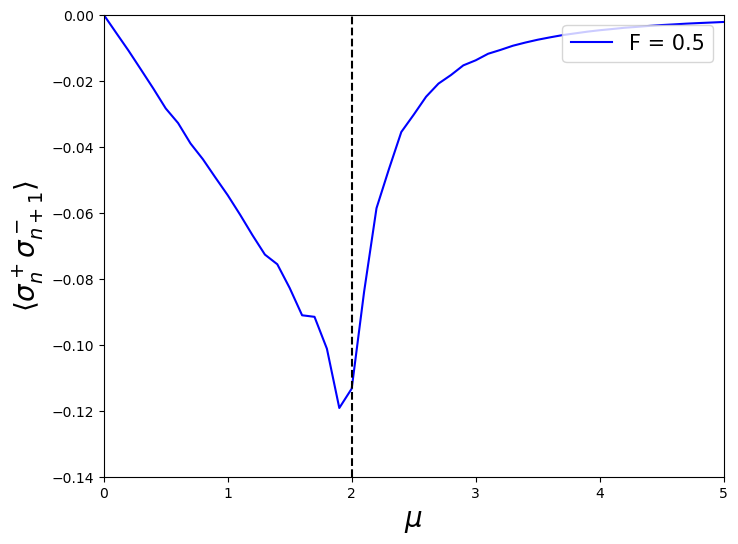

In [5]:
# Customized colors for each plot
colors = ['Blue']

# Plot
plt.figure(figsize=(8, 6))  # Adjust the figure size as needed

  
label = 'F = ' + str(F) 
plt.plot(muArray, SpSm_sudden, color=colors[0], label=label)

# Add a dashed black vertical line at x = 2
plt.axvline(x=2, color='black', linestyle='--')

# Customize the plot
plt.xlabel(r'$\mu$', fontsize=20)  # Set the x-axis label
plt.ylabel(r'$\langle\sigma_n^+\sigma_{n+1}^-\rangle$', fontsize=20)  # Set the y-axis label
#plt.title(r'(t = '+str(3)+')', fontsize=20)  # Set the plot title

# Set the plot range
plt.xlim(mui, 5)  # Set the x-axis range
plt.ylim(-0.14, 0)  # Set the y-axis range

plt.legend(loc='upper right', fontsize=15)  # Add a legend to the plot

# Save the plot
#plt.savefig('Occupation_density_in_mu.jpg', dpi=300, format='jpg')

# Display the plot
plt.show()


Now analytical for sudden:

In [6]:
# Compute corr
SpSm_sudden_anal = np.piecewise(
    muAnal,
    [np.abs(muAnal) > 2 * np.abs(J), np.abs(muAnal) <= 2 * np.abs(J)],
    [
        lambda mu: (
            0.5 * F**2 * J * (
                -2 * F**2 + 2 * J**2 - mu**2 + mu * np.sqrt(4 * F**2 - 4 * J**2 + mu**2)
            ) / ((F**2 - J**2)**2 * np.sqrt(4 * F**2 - 4 * J**2 + mu**2))
        ),
        lambda mu: -mu / (4 * np.abs(F) * (1 + np.abs(J / F))**2)
    ]
)



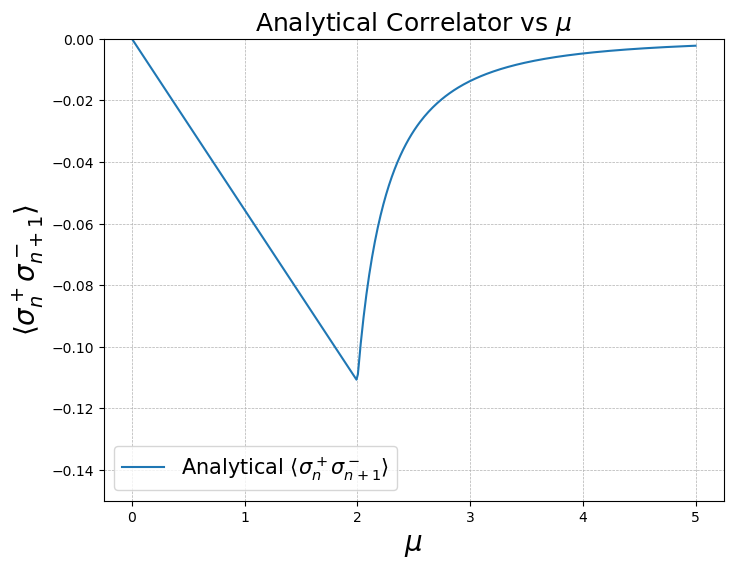

In [7]:
plt.figure(figsize=(8, 6))
plt.plot(muAnal, SpSm_sudden_anal, label=r'Analytical $\langle\sigma_n^+\sigma_{n+1}^-\rangle$')
plt.xlabel(r'$\mu$', fontsize=20)
plt.ylabel(r'$\langle\sigma_n^+\sigma_{n+1}^-\rangle$', fontsize=20)
plt.title(r'Analytical Correlator vs $\mu$', fontsize=18)
plt.legend(fontsize=15)
plt.grid(True, linestyle='--', linewidth=0.5)
plt.ylim(-0.15, 0)
plt.show()

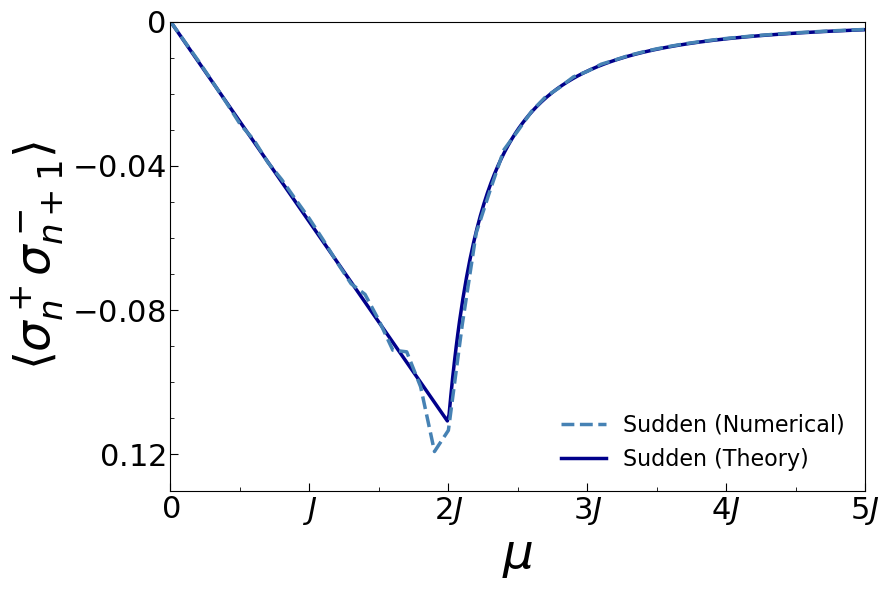

In [8]:
fig, ax1 = plt.subplots(figsize=(9, 6))

color1 = '#4682B4'  # SteelBlue - a bit darker for dashed line
dashed_color1 = '#00008B'  # Darker blue for solid line
color1_axis_label = 'black'

ax1.plot(muArray, SpSm_sudden, color=color1, linewidth=2.5, linestyle='dashed', label='Sudden (Numerical)', zorder=2)
ax1.plot(muAnal, SpSm_sudden_anal, color=dashed_color1, linewidth=2.5, linestyle='solid', label='Sudden (Theory)', zorder=1)

ax1.set_xlabel(r'$\mu$', fontsize=35)
ax1.set_ylabel(r'$\langle \sigma_n^+\sigma_{n+1}^- \rangle$', color=color1_axis_label, fontsize=35)

ax1.tick_params(axis='y', labelcolor=color1_axis_label)
ax1.tick_params(axis='both', which='major', direction='in', length=6, labelsize=16)
ax1.tick_params(axis='both', which='minor', direction='in', length=3, labelsize=16)

ax1.xaxis.set_minor_locator(MultipleLocator(0.5))
ax1.yaxis.set_minor_locator(AutoMinorLocator())

ax1.set_ylim([-0.13, 0])
ax1.set_xlim([0, 5])

ax1.set_xticks([0, 1, 2, 3, 4, 5], labels=[r'$0$', r'$J$', r'$2J$', r'$3J$', r'$4J$', r'$5J$'], fontsize=22)
ax1.set_yticks([0,-0.04, -0.08, -0.12], labels=[r'$0$', r'$-0.04$', r'$-0.08$', r'$0.12$'], fontsize=22)

ax1.legend(loc='lower right', fontsize=16, frameon=False)

plt.tight_layout()
plt.show()

<div style="text-align: center;">
    <h3>Second code for adiabatic</h3>
</div>

First, we do analytical:

In [9]:
def SpSm_corr2_analytical(mu: float, F: float) -> float:
    """
    Calculates the SpSm_corr2_analytical correlation function.

    Args:
        mu (float): The mu parameter.
        F (float): The F parameter.

    Returns:
        float: The calculated correlation value.
    """

    # Define the first integrand
    def integrand1(k: float) -> float:
        X = mu - 2 * np.cos(k)
        Y = 2 * F * np.sin(k)

        # Handle the singularity where X=0 and Y=0
        if X == 0 and Y == 0:
            return 0.0  # Define the integrand value at the singularity

        # Use np.arctan2 for numerical stability for the angular terms
        # This is equivalent to Abs[X]/Sqrt[X^2+Y^2] * cos(k)
        # Note: abs(cos(arctan2(Y, X))) is equivalent to abs(X) / sqrt(X^2 + Y^2)
        return abs(np.cos(np.arctan2(Y, X))) * np.cos(k)

    # Perform the numerical integrations using scipy.integrate.quad
    # It's good practice to add rtol (relative tolerance) and atol (absolute tolerance)
    # in case the default tolerances are too loose or too strict.
    integral1, _ = quad(integrand1, -np.pi, np.pi, epsabs=1e-8, epsrel=1e-8)

    # Calculate the final expression
    prefactor = 1 / (4 * np.pi)
    result = prefactor * integral1

    return result

In [10]:
SpSm_adiabatic_anal = [SpSm_corr2_analytical(mu, F) for mu in muAnal]

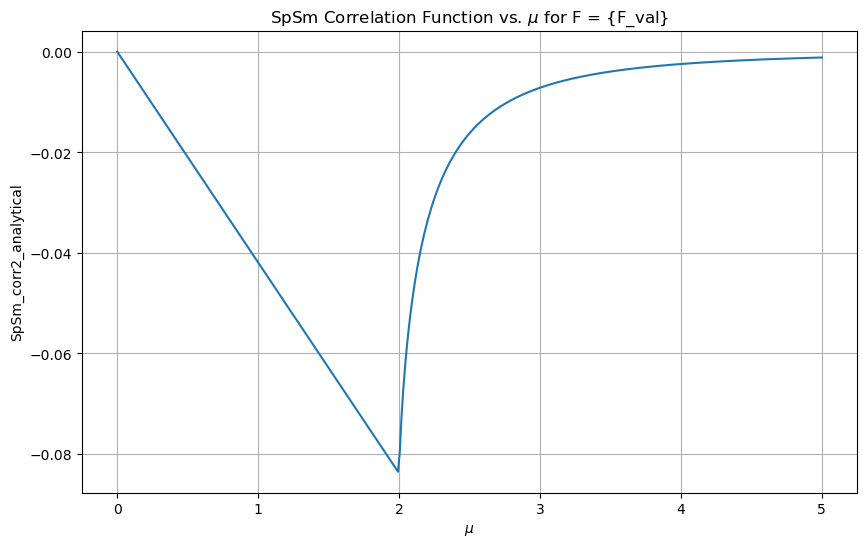

In [11]:
# Plotting
plt.figure(figsize=(10, 6))
plt.plot(muAnal, SpSm_adiabatic_anal)
plt.title(r'SpSm Correlation Function vs. $\mu$ for F = {F_val}')
plt.xlabel(r'$\mu$')
plt.ylabel('SpSm_corr2_analytical')
plt.grid(True)
plt.show() # Use plt.show() to display the plot when running interactively
# If you want to save the plot to a file, uncomment the line below:
# plt.savefig('SpSm_corr2_analytical_plot.png')
plt.close() # Close the plot figure after displaying or saving

Second, numerical:

This one is done by adiabatically turning on the drive to a final $F$ at $t=\tau$, then evolve for constant $F$ from $t=\tau$ to $t=\tau+30$ and avererage the correlations over this interval (30). 

In [12]:
# Define the folder path
folder = f"output_avg_N={N_adiabatic},alpha=0.001,F={F}"

# Initialize empty lists to store the data
density_F = []
Sz_F_correlation = []
SpSm_adiabatic = []

print(f"Reading data from folder: {folder}")

# Start timing
start_time = time.time()

# Loop through the files from 1 to 51 (inclusive)
for i in range(1,52): # Julia's 1:51 translates to Python's range(1, 51)
    filename = os.path.join(folder, f"output_for_N{N_adiabatic}_mu{i}.txt")
    try:
        # Read the data from the file. 
        # Assuming each file contains 5 float numbers, one per line or space-separated on a single line.
        # If it's a single line of space-separated numbers, np.loadtxt will handle it.
        # If each number is on a new line, np.loadtxt also handles it by default.
        data = np.loadtxt(filename)
        
        # Check if the data has the expected length (5 elements)
        if len(data) == 3:
            # Append data to the respective lists (Python uses 0-based indexing)
            density_F.append(data[0])
            Sz_F_correlation.append(data[1])
            SpSm_adiabatic.append(data[2])
        else:
            print(f"Warning: File {filename} does not contain 3 elements. Skipping.")

    except FileNotFoundError:
        print(f"Error: File not found at {filename}. Skipping.")
    except Exception as e:
        print(f"Error reading {filename}: {e}. Skipping.")

# End timing
end_time = time.time()
elapsed_time = end_time - start_time

print(f"Finished reading data in {elapsed_time:.4f} seconds.")

Reading data from folder: output_avg_N=40,alpha=0.001,F=0.5
Finished reading data in 0.2045 seconds.


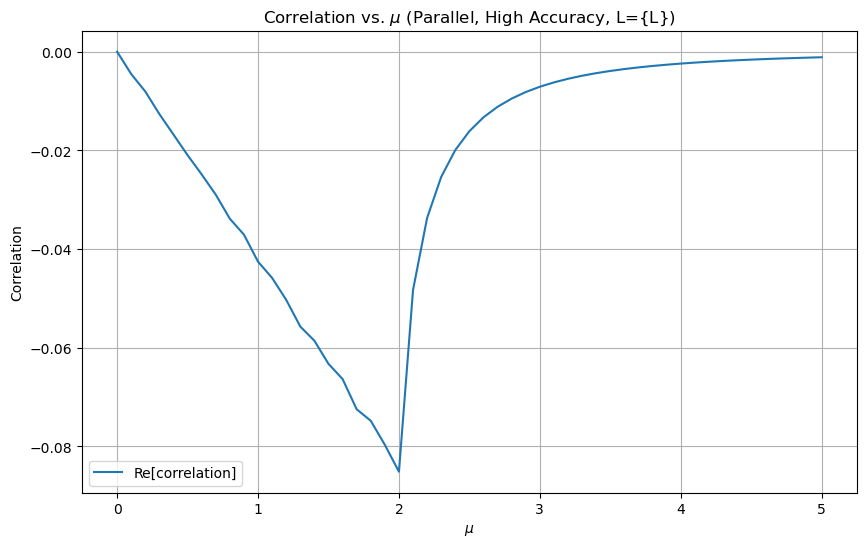

In [13]:
# --- Plotting ---
plt.figure(figsize=(10, 6))
plt.plot(muArray, np.real(SpSm_adiabatic), label='Re[correlation]')
plt.xlabel(r'$\mu$')
plt.ylabel('Correlation')
plt.title(r'Correlation vs. $\mu$ (Parallel, High Accuracy, L={L})')
plt.grid(True)
plt.legend()
plt.show()

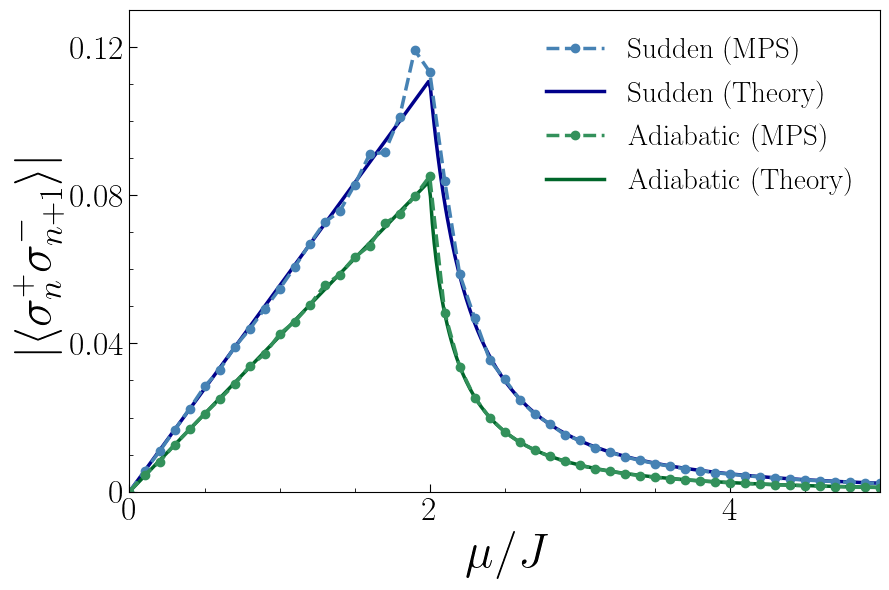

In [17]:
plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = 'serif'

fig, ax1 = plt.subplots(figsize=(9, 6))

# Define colors for lines - keeping original separation for clarity
color_sudden_num = '#4682B4'   # SteelBlue for Sudden (Numerical) dashed
color_sudden_anal = '#00008B'  # Darker blue for Sudden (Theory) solid
color_adiabatic_num = "#33915B" # SeaGreen for Adiabatic (Numerical) dashed
color_adiabatic_anal = "#00662A" # Darker green for Adiabatic (Theory) solid

# A single color for the unified Y-axis label and ticks
unified_axis_color = 'black' # Or choose one of the line colors like '#00008B' for consistency

# Plotting all four arrays on ax1
#ax1.plot(muArray, SpSm_sudden, color=color_sudden_num, linewidth=2.5, linestyle='dashed', label='Sudden (Numerical)', zorder=2)
#ax1.plot(mu, SpSm_sudden_anal, color=color_sudden_anal, linewidth=2.5, linestyle='solid', label='Sudden (Theory)', zorder=1)
#ax1.plot(muArray, np.real(correlation), color=color_adiabatic_num, linewidth=2.5, linestyle='dashed', label='Adiabatic (Numerical)', zorder=2)
#ax1.plot(mu, SpSm_adiabatic_anal, color=color_adiabatic_anal, linewidth=2.5, linestyle='solid', label='Adiabatic (Theory)', zorder=1)
ax1.plot(muArray, np.abs(SpSm_sudden), color=color_sudden_num, linewidth=2.5, linestyle='dashed', marker='o', markersize=6, label='Sudden (MPS)', zorder=2)
ax1.plot(muAnal, np.abs(SpSm_sudden_anal), color=color_sudden_anal, linewidth=2.5, linestyle='solid', label='Sudden (Theory)', zorder=1)
ax1.plot(muArray, np.abs(np.real(SpSm_adiabatic)), color=color_adiabatic_num, linewidth=2.5, linestyle='dashed', marker='o', markersize=6, label='Adiabatic (MPS)', zorder=2)
ax1.plot(muAnal, np.abs(SpSm_adiabatic_anal), color=color_adiabatic_anal, linewidth=2.5, linestyle='solid', label='Adiabatic (Theory)', zorder=1)

ax1.set_xlabel(r'$\mu/J$', fontsize=35)
# Updated Y-axis title
ax1.set_ylabel(r'$|\langle \sigma_n^+\sigma_{n+1}^- \rangle|$', color=unified_axis_color, fontsize=35)

ax1.tick_params(axis='y', labelcolor=unified_axis_color) # Apply color to unified y-axis ticks
ax1.tick_params(axis='both', which='major', direction='in', length=6, labelsize=16)
ax1.tick_params(axis='both', which='minor', direction='in', length=3, labelsize=16)

ax1.xaxis.set_minor_locator(MultipleLocator(0.5))
ax1.yaxis.set_minor_locator(AutoMinorLocator())


ax1.set_ylim([0.005, 0.13]) # Adjusted Y-axis limits
ax1.set_xlim([0, 5])

ax1.set_xticks([0, 2, 4], labels=[r'$0$', r'$2$', r'$4$'], fontsize=24)
ax1.set_yticks([0,0.04, 0.08, 0.12], labels=[r'$0$', r'$0.04$', r'$0.08$', r'$0.12$'], fontsize=24)

# Combine legends into a single legend for ax1
ax1.legend(loc='upper right', fontsize=21, frameon=False)

plt.tight_layout()

plt.savefig('SpSm_adiabatic_and_sudden.png', dpi=300, format='png', bbox_inches='tight')
plt.show()